# Proyecto práctico

## Unidad 3 - Aprendizaje supervisado

El proyecto práctico consiste en abordar un problema de clasificación de documentos textuales. Tenemos a nuestra disposición un dataset de noticias de prensa en español publicada por el medio "CNN Chile".

Las noticias están divididas en 7 categorías temáticas: *'pais','deportes','tendencias','tecnologias','cultura','economia','mundo'*

El proyecto se divide en dos partes:

- Utilizar al menos 3 estrategías para entrenar modelos de clasificación capaces de clasificar las noticias según su categoría temática.

- Explorar cuáles son las características que permiten explicar las decisiones de su modelo.

## 0. Evaluación

El proyecto se realiza de forma individual. Se entrega a más tardar el **lunes 30 de noviembre** en su repositorio GitHub.

**Pauta de evaluación:**

Competencia 1: Aplicar un protocolo de aprendizaje supervisado para resolver un problema clasificación estandar, utilizando un entorno de programación en Python

- < 2 : El protocolo de aprendizaje supervisado utilizado es incompleto y/o presenta errores importantes
- 2 a 3.9 : El protocolo de aprendizaje supervisado utilizado es incompleto o presenta un error importante
- 4 a 5.5 : El protocolo de aprendizaje es completo, no tiene error, pero las estrategias utilizadas son relativamente simples y el rendimiento de los modelos es perfectible.
- 5.6 a 7.0 : El protocolo de aprendizaje es completo, no tiene error y al menos una de las estrategias utilizadas a necesitado un trabajado más avanzado y/o permite obtener un mejor rendimiento.

Competencia 2: Explicar el rendimiento de un modelo de clasificación aplicando un protocolo de evaluación Precision/Recall/F-Score

- < 2 : El trabajo no presenta explicaciones del rendimiento de los modelos de clasificación
- 2 a 3.9 : El trabajo presenta algunas explicaciones pero tienen errores.
- 4 a 5.5 : El trabajo presenta explicaciones correctas del rendimiento de los modelos
- 5.6 a 7 : El trabajo presenta explicaciones correctas del rendimiento de los modelos y además presenta un método para explicar las decisiones/errores


## 1. Dataset

In [115]:
import pandas as pd

df = pd.read_csv('cnnchile_7000.csv')
df

,country,media_outlet,url,title,text,date,category
0,chile,cnnchile,https://www.cnnchile.com/pais/pdta-del-colegio...,Pdta. del Colegio de Matronas explicó los ries...,La Federación de Estudiantes de la Universidad...,2018-03-29 00:00:00.000000,pais
1,chile,cnnchile,https://www.cnnchile.com/pais/defensoria-ninez...,Defensoría de la Niñez pide al Estado velar po...,La Defensoría de la Niñez emitió este domingo ...,2020-08-02 00:00:00.000000,pais
2,chile,cnnchile,https://www.cnnchile.com/pais/cuanto-les-pagar...,¿Cuánto les pagarán a los vocales de mesa?,El monto del bono es de dos tercios de Unidad ...,2016-10-20 00:00:00.000000,pais
3,chile,cnnchile,https://www.cnnchile.com/pais/sobrino-de-aleja...,Sobrino de Alejandro Navarro intenta “funar” e...,Una nueva polémica tiene esta carrera presiden...,2017-11-13 00:00:00.000000,pais
4,chile,cnnchile,https://www.cnnchile.com/pais/analisis-sobre-e...,Análisis sobre el aumento de impuestos para al...,Especialistas recomiendan no consumir más de 2...,2014-05-05 00:00:00.000000,pais
...,...,...,...,...,...,...,...
6995,chile,cnnchile,https://www.cnnchile.com/tecnologias/playstati...,PlayStation 5 vs Xbox Series X: Mira la compar...,Las compañías ya han revelado muchos detalles ...,2020-09-18 00:00:00.000000,tecnologias
6996,chile,cnnchile,https://www.cnnchile.com/tecnologias/android-l...,Android le dará “una paliza” a Windows en 2013,Se proyecta que tras un virtual empate en 2012...,2013-04-04 00:00:00.000000,tecnologias
6997,chile,cnnchile,https://www.cnnchile.com/tecnologias/regalos-t...,Regalos tecnológicos marcaron pauta en Navidad,Tablets y smartphones fueron los regalos tecno...,2012-12-26 00:00:00.000000,tecnologias
6998,chile,cnnchile,https://www.cnnchile.com/tecnologias/jugar-con...,Jugar con Fox en Starlink vale totalmente la p...,Crecí jugando clásicos de naves como Terminal ...,2018-10-30 00:00:00.000000,tecnologias


In [116]:
from pandasql import sqldf

q="""SELECT category, count(*) FROM df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,tendencias,1000
1,tecnologias,1000
2,pais,1000
3,mundo,1000
4,economia,1000
5,deportes,1000
6,cultura,1000


# Resolucion

In [117]:
from sklearn.model_selection import train_test_split

X = df['text'] 
ylabels = df['category']

In [118]:
ylabels[:5]

0    pais
1    pais
2    pais
3    pais
4    pais
Name: category, dtype: object

In [119]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
ylabels_encoded = lb.fit_transform(ylabels)

In [120]:
ylabels_encoded[:5]

array([4, 4, 4, 4, 4])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels_encoded, test_size=0.5)

## Primera estrategia (Regresion Logistica)

Nuestro objetivo es entrenar un modelo de regresion logistica para clasificar las noticias segun su categoria. por lo que no necesitaremos la variable pais, media_outlet, titulo, url y fecha. dicho esto se eliminaran estas variables

In [122]:
df.drop(['country','media_outlet','title','url','date'], axis = 1)

,text,category
0,La Federación de Estudiantes de la Universidad...,pais
1,La Defensoría de la Niñez emitió este domingo ...,pais
2,El monto del bono es de dos tercios de Unidad ...,pais
3,Una nueva polémica tiene esta carrera presiden...,pais
4,Especialistas recomiendan no consumir más de 2...,pais
...,...,...
6995,Las compañías ya han revelado muchos detalles ...,tecnologias
6996,Se proyecta que tras un virtual empate en 2012...,tecnologias
6997,Tablets y smartphones fueron los regalos tecno...,tecnologias
6998,Crecí jugando clásicos de naves como Terminal ...,tecnologias


### Implementación del modelo Bag of words

In [123]:
import spacy
nlp = spacy.load("es_core_news_lg")

In [124]:
def feature_extraction(text):
    
    mytokens = nlp(text)

    #Guardamos las palabras como características si corresponden a ciertas categorias gramaticales
    mytokens = [ word for word in mytokens if word.pos_ in ["NOUN", "ADJ", "VERB"] ]
    
    #Transformamos las palabras en minusculas
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]

    # return preprocessed list of tokens
    return mytokens

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(tokenizer = feature_extraction, min_df=0., max_df=1.0)

### Entrenamiento de un modelo Regresión Logística

In [130]:
from sklearn.model_selection import train_test_split

X = df['text'] 
ylabels = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.65) 

In [131]:
ylabels

0              pais
1              pais
2              pais
3              pais
4              pais
           ...     
6995    tecnologias
6996    tecnologias
6997    tecnologias
6998    tecnologias
6999    tecnologias
Name: category, Length: 7000, dtype: object

In [132]:
X_train.shape

(2450,)

In [133]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()

pipe = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', model_1)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizing',
                 TfidfVectorizer(min_df=0.0,
                                 tokenizer=<function feature_extraction at 0x0000011761DD63A0>)),
                ('learning', LogisticRegression())])

In [134]:
#print(len(model_1.coef_[0]))

#for coef in model_1.coef_[0]:
#    print(coef)

### Evaluación del modelo Regresión Logística

In [135]:
from sklearn import metrics

predicted = pipe.predict(X_test)
print(predicted)


['economia' 'tecnologias' 'cultura' ... 'deportes' 'economia' 'pais']


In [136]:
# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.7569230769230769


In [137]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))



[[558   3   1  29   4   6  34]
 [  3 560  21  15  15   4  51]
 [  1  16 522  13  57  18   9]
 [  7  19  31 473  63  16  40]
 [  5  16  64  73 473   9  28]
 [ 19  30  53  10  14 439  88]
 [ 69  23  14  14  16  85 419]]
              precision    recall  f1-score   support

     cultura       0.84      0.88      0.86       635
    deportes       0.84      0.84      0.84       669
    economia       0.74      0.82      0.78       636
       mundo       0.75      0.73      0.74       649
        pais       0.74      0.71      0.72       668
 tecnologias       0.76      0.67      0.71       653
  tendencias       0.63      0.65      0.64       640

    accuracy                           0.76      4550
   macro avg       0.76      0.76      0.76      4550
weighted avg       0.76      0.76      0.76      4550



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'cultura'),
  Text(0, 1.5, 'deportes'),
  Text(0, 2.5, 'economia'),
  Text(0, 3.5, 'mundo'),
  Text(0, 4.5, 'pais'),
  Text(0, 5.5, 'tecnologias'),
  Text(0, 6.5, 'tendencias')])

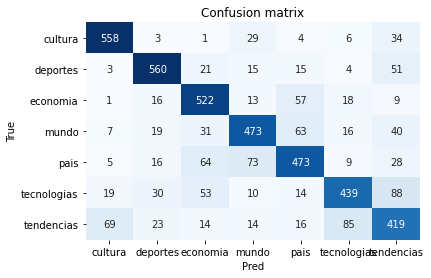

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

classes = np.unique(y_test)

cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


## Segunda estrategia (Naïve Bayes)

### Implementacion del modelo

In [139]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

model_nb = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', nb)])

### Entrenamiento del modelo

In [140]:
import time

start = time.time()

model_nb.fit(X_train, y_train)

end = time.time()
print("tiempo para entrenar:" + str(end - start)) # tiempo para entrenar

tiempo para entrenar:85.78600001335144


### Evaluacion del modelo 

In [141]:
start = time.time()

predicted = model_nb.predict(X_test)

end = time.time()
print("tiempo para predecir:" + str(end - start)) # tiempo para predecir

tiempo para predecir:155.24380326271057


In [142]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

print(confusion_matrix)

print(classification_report(y_test, predicted))

[[609   0   4  15   4   3   0]
 [ 43 552  25  17  12   6  14]
 [  6  16 567   6  24  17   0]
 [ 45  16  47 473  33  25  10]
 [ 28  13 126  83 401  11   6]
 [ 66  27  68   9   3 452  28]
 [177  25  35  21  10 116 256]]
              precision    recall  f1-score   support

     cultura       0.63      0.96      0.76       635
    deportes       0.85      0.83      0.84       669
    economia       0.65      0.89      0.75       636
       mundo       0.76      0.73      0.74       649
        pais       0.82      0.60      0.69       668
 tecnologias       0.72      0.69      0.70       653
  tendencias       0.82      0.40      0.54       640

    accuracy                           0.73      4550
   macro avg       0.75      0.73      0.72      4550
weighted avg       0.75      0.73      0.72      4550



In [143]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.7274725274725274


## Tercera estrategia (K-vecinos)

### Implementacion del modelo

In [144]:
from sklearn import neighbors
from sklearn.pipeline import Pipeline

n_neighbors = 15

knn = neighbors.KNeighborsClassifier(n_neighbors)

model_knn = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', knn)])

### Entrenamiento del modelo

In [145]:
import time

start = time.time()

model_knn.fit(X_train, y_train)

end = time.time()
print("tiempo para entrenar:" + str(end - start))

tiempo para entrenar:85.41568946838379


### Evaluacion del modelo

In [146]:
start = time.time()

predicted = model_knn.predict(X_test)

end = time.time()
print("tiempo para predecir:" + str(end - start))

tiempo para predecir:164.35976934432983


In [147]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, predicted)

print(confusion_matrix)

print(classification_report(y_test, predicted))

[[577   4   6  23   7   9   9]
 [ 21 580  25  12  13   8  10]
 [  4  17 543  13  37  17   5]
 [ 27  22  45 457  56  29  13]
 [ 27  24 111  98 379  16  13]
 [ 31  33  74  14  10 458  33]
 [122  36  30  36  18 107 291]]
              precision    recall  f1-score   support

     cultura       0.71      0.91      0.80       635
    deportes       0.81      0.87      0.84       669
    economia       0.65      0.85      0.74       636
       mundo       0.70      0.70      0.70       649
        pais       0.73      0.57      0.64       668
 tecnologias       0.71      0.70      0.71       653
  tendencias       0.78      0.45      0.57       640

    accuracy                           0.72      4550
   macro avg       0.73      0.72      0.71      4550
weighted avg       0.73      0.72      0.71      4550



In [148]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.721978021978022
